In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset 

data= pd.read_csv("data.csv")

In [3]:
# Look at the first 5 rows

data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# Look at the last 5 rows

data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
# Check out the number of rows and columns.
data.shape

(6019, 14)

In [6]:
# Look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
# Check out the Dataset
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
# Check how many unique "Name" are there?

data['Name'].nunique()

1876

In [9]:
# Split the data in "Engine", "Mileage" and "Power" column.

eng = data["Engine"].str.split(" ", expand = True)
mil = data["Mileage"].str.split(" ", expand = True)
pov = data["Power"].str.split(" ", expand = True)


In [10]:
# Impute the above values into the column.

data['Engine']=eng
data['Mileage']=mil
data['Power']= pov

In [11]:
# Now look at the first 5 rows

data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [12]:
# Convert the datatype of following 4 rows from object to numeric.

data["Mileage"] = pd.to_numeric(data.Mileage, errors='coerce')
data["Engine"] = pd.to_numeric(data.Engine, errors='coerce')
data["Power"] = pd.to_numeric(data.Power, errors='coerce')
data["Seats"] = pd.to_numeric(data.Seats, errors='coerce')


In [13]:
# Now look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null float64
Engine               5983 non-null float64
Power                5876 non-null float64
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


##### DATA CLEANING 

In [14]:
# Check for null Values

data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [15]:
# Imputing null values by taking the mean values.

data["Engine"].fillna(data["Engine"].mean(), inplace = True)
data["Power"].fillna(data["Power"].mean(), inplace = True)
data["Seats"].fillna(data["Seats"].mean(), inplace = True)
data["Mileage"].fillna(data["Mileage"].mean(), inplace = True)

In [16]:
# Now look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


In [17]:
# Check out the Dataset
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [18]:
# Drop the Columns "New_Price" and "Unnamed: 0"

cars = data.drop(['New_Price','Unnamed: 0'],axis=1)

In [19]:
# Now look at top 5 rows.

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [20]:
# Now look at the information for all the columns.

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [21]:
# Create a new column showing the number of years. 
year = 2020
cars['No_of_Years'] = cars['Year'].apply(lambda x :year - x)

In [22]:
# Look at the first 5 rows

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,7


In [23]:
# Converting Price in lakhs(Indian Curreny) to Canadian Dollars by using an exchange rate  .

cars['Price']=(cars['Price']*1824.504).round(2)

In [24]:
# Look at the top 5 rows .

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7


In [25]:
# Split the "Name" column.

Nam = data["Name"].str.split(" ", expand = True)

In [26]:
# Create 2 columns which shows the Manufacturer name and Car name.

cars['Manufacture_Name']=Nam[0]
cars['Car_Name']=Nam[1]

In [27]:
# Look at the top 5 rows.

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years,Manufacture_Name,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7,Audi,A4


In [28]:
# Find the number of unique Manufacturers.

cars['Manufacture_Name'].nunique()

31

In [29]:
# Find the number of unique Car name
cars['Car_Name'].nunique()

214

##### DATA VISUALIZATIONS

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

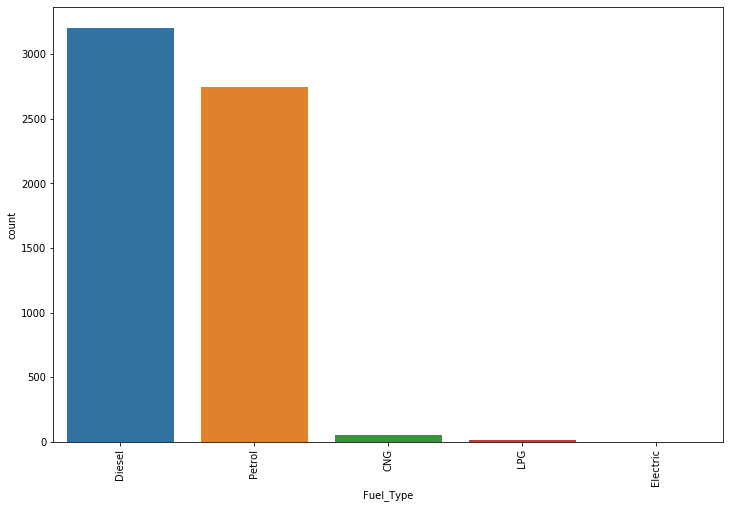

In [30]:
# Histogram for fuel type. 

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Fuel_Type'], data = cars,order = cars['Fuel_Type'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

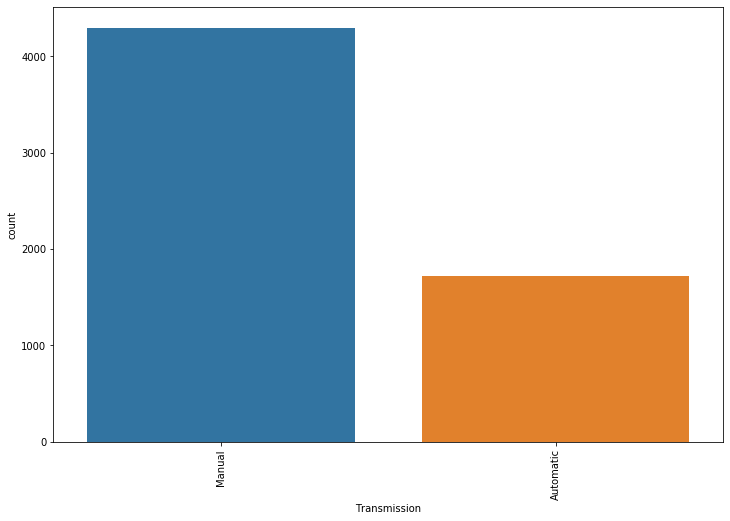

In [31]:
# Histogram showing different Transmission types

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Transmission'], data = cars)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

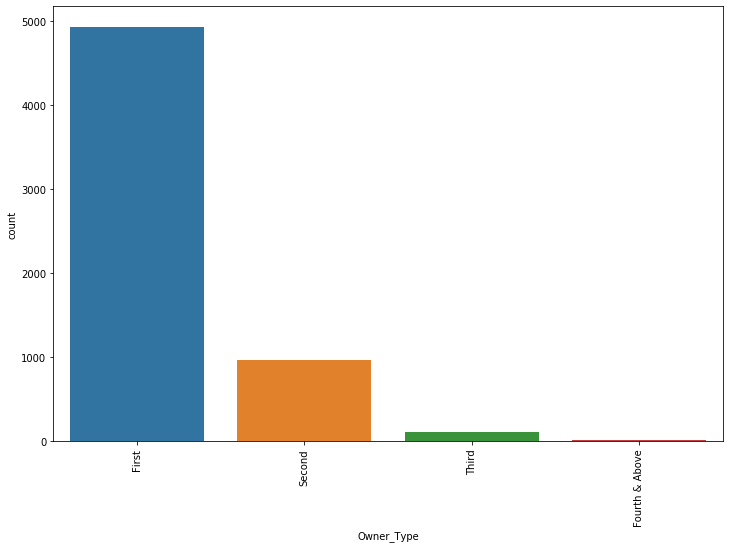

In [32]:
#  Histogram showing different Owner types

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Owner_Type'], data = cars, order = cars['Owner_Type'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

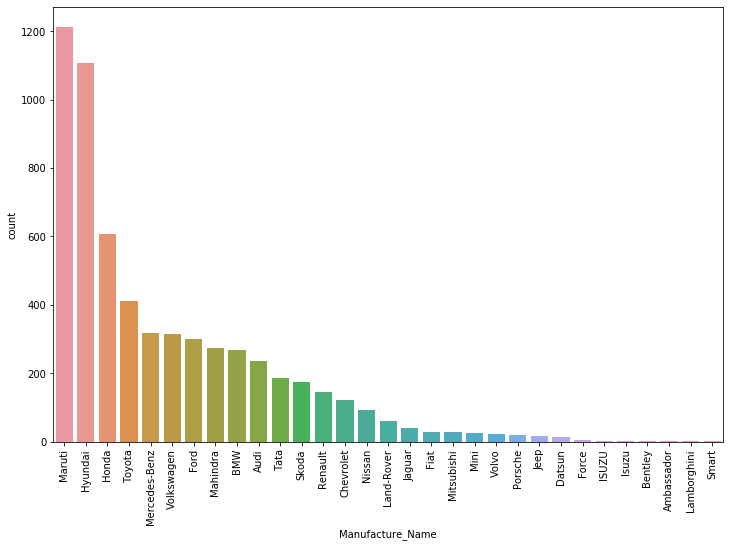

In [33]:
#  Histogram showing different Manufacture Names.
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Manufacture_Name'], data = cars, order = cars['Manufacture_Name'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

In [34]:
# Unique Manufacture names.
print("Manufacture Names: " , cars['Manufacture_Name'].unique())

Manufacture Names:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land-Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini'
 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [35]:
cars['Manufacture_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land-Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Bentley             1
Ambassador          1
Lamborghini         1
Smart               1
Name: Manufacture_Name, dtype: int64

In [36]:
# Replace "Isuzu" with "ISUZU"

cars['Manufacture_Name'].replace(to_replace =["Isuzu"],  
                            value ="ISUZU",inplace=True) 

In [37]:
# Print out the Values.

print("Manufacture Names: " , cars['Manufacture_Name'].unique())

Manufacture Names:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land-Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini'
 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [54]:
# Count of Unique Manufacture names.
print(" Count of Unique Manufacture Names: " , cars['Manufacture_Name'].nunique())

 Count of Unique Manufacture Names:  30


In [55]:
# Count of Unique Car names.
print(" Count of Unique Car Names: " , cars['Car_Name'].nunique())

 Count of Unique Car Names:  214


In [65]:
cars['Manufacture_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land-Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               3
Bentley             1
Ambassador          1
Lamborghini         1
Smart               1
Name: Manufacture_Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

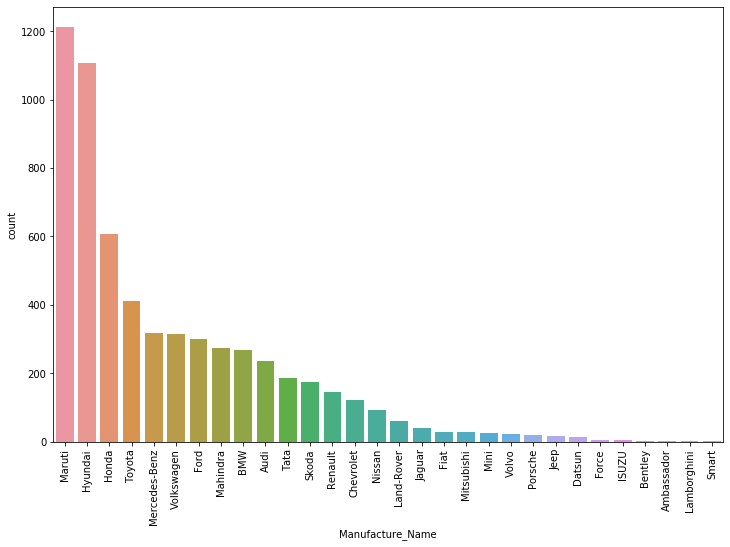

In [58]:
#  Histogram showing different Manufacture Names
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Manufacture_Name'], data = cars, order = cars['Manufacture_Name'].value_counts().index)
plt.xticks(rotation = 90)

In [40]:
# Description about the Price Column
print(cars['Price'].describe(percentiles = [0.25,0.50,0.75,0.80,0.90,1]))

count      6019.000000
mean      17295.327868
std       20412.399578
min         802.780000
25%        6385.760000
50%       10290.200000
75%       18153.810000
80%       22806.300000
90%       41051.340000
100%     291920.640000
max      291920.640000
Name: Price, dtype: float64


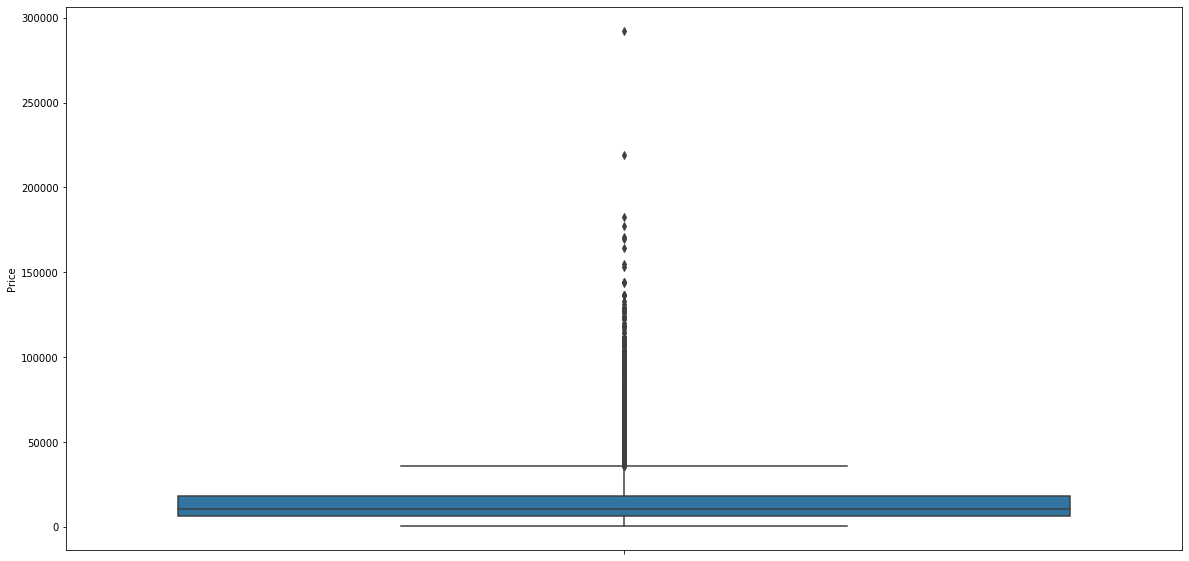

In [41]:
# Box Plot For Price feature
plt.figure(figsize=(20,10))
plt.ylim()
sns.boxplot(y=cars['Price'])

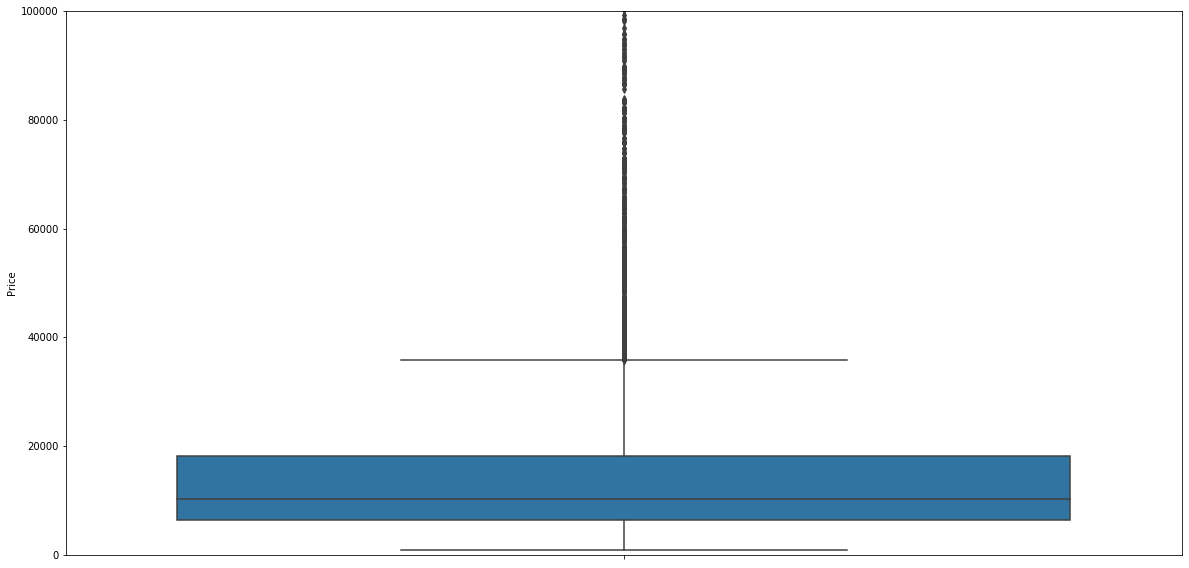

In [42]:
# Box Plot For Price feature with y axis range 0 to 100000
plt.figure(figsize=(20,10))
plt.ylim(0,100000)
sns.boxplot(y=cars['Price'])

In [43]:
# Look at the top 5 rows
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years,Manufacture_Name,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7,Audi,A4


In [112]:
# Drop columns which are of least importance.
cars_new = cars.drop(['Name','Location','Year','Manufacture_Name','Car_Name'],axis=1)

In [113]:
# Scaling the features using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
labels= ['Kilometers_Driven','Mileage','Engine','Power','Seats','No_of_Years']
cars_new[labels] = scaler.fit_transform(cars_new[labels])

In [114]:
# Convert the categorical values into dummies using the get_dummies function  
df=pd.get_dummies(cars_new['Fuel_Type'])
cars_new=pd.concat([cars_new,df],axis=1)
cars_new.drop(['Fuel_Type'],axis=1,inplace=True)
df=pd.get_dummies(cars_new['Transmission'])
cars_new=pd.concat([cars_new,df],axis=1)
cars_new.drop(['Transmission'],axis=1,inplace=True)
df=pd.get_dummies(cars_new['Owner_Type'])
cars_new=pd.concat([cars_new,df],axis=1)
cars_new.drop(['Owner_Type'],axis=1,inplace=True)

In [ ]:
# Scaling the features using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
labels= ['Mileage','Engine','Power','Seats','No_of_Years']
cars_new[labels] = scaler.fit_transform(cars_new[labels])

In [115]:
# Look at the data
cars_new

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,0.011051,0.793083,0.156261,0.045569,0.5,3192.88,0.428571,1,0,0,0,0,0,1,1,0,0,0
1,0.006282,0.586464,0.254809,0.174971,0.5,22806.30,0.190476,0,1,0,0,0,0,1,1,0,0,0
2,0.007051,0.542636,0.190179,0.103652,0.5,8210.27,0.380952,0,0,0,0,1,0,1,1,0,0,0
3,0.013359,0.619261,0.198448,0.103766,0.7,10947.02,0.333333,0,1,0,0,0,0,1,1,0,0,0
4,0.006231,0.453190,0.319946,0.202739,0.5,32366.70,0.285714,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0.004184,0.846750,0.198448,0.075694,0.5,8666.39,0.238095,0,1,0,0,0,0,1,1,0,0,0
6015,0.015359,0.727490,0.176848,0.069989,0.5,7298.02,0.190476,0,1,0,0,0,0,1,1,0,0,0
6016,0.008435,0.417412,0.409382,0.147965,0.8,5291.06,0.333333,0,1,0,0,0,0,1,0,0,1,0
6017,0.007051,0.563506,0.156261,0.062571,0.5,4834.94,0.285714,0,0,0,0,1,0,1,1,0,0,0


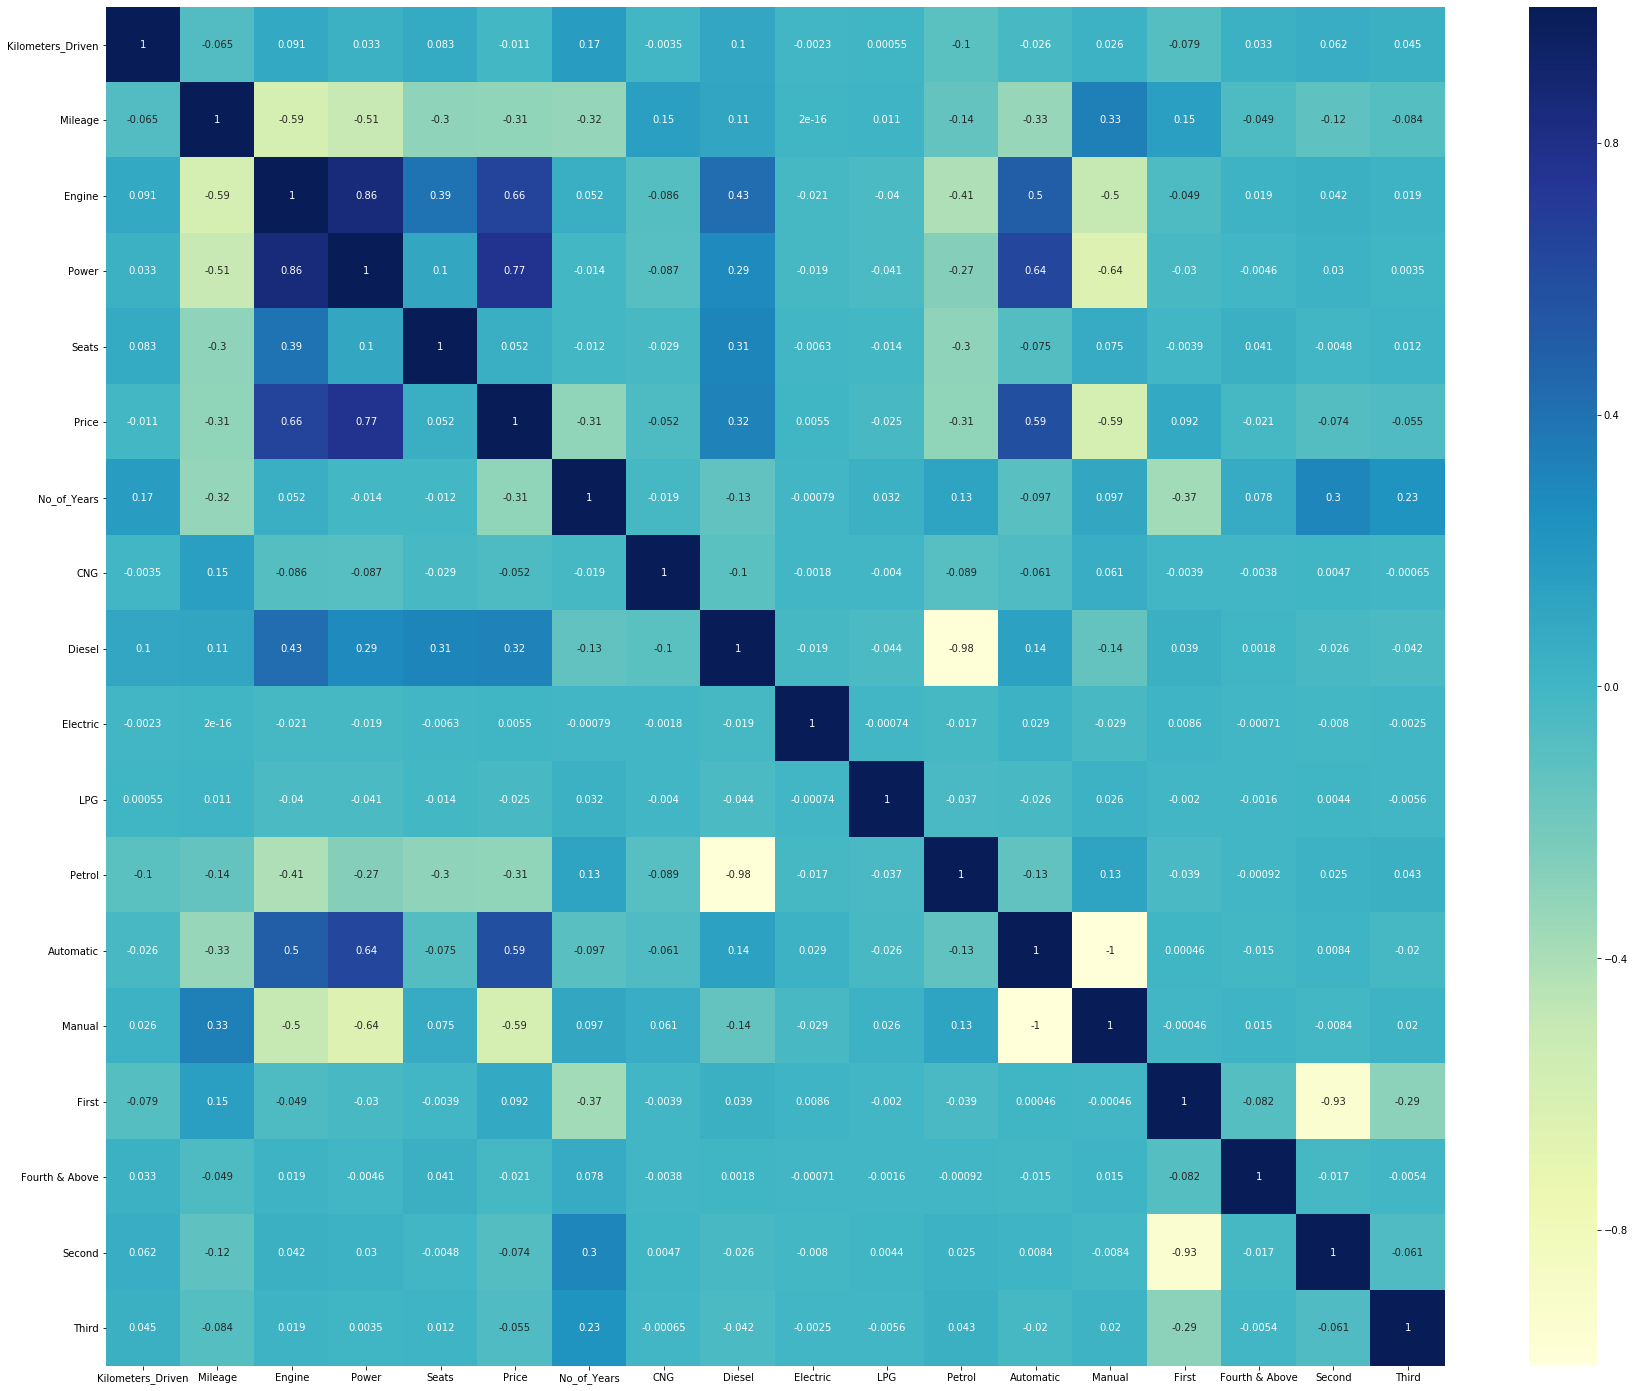

In [127]:
# Correlation Heat map
plt.figure(figsize = (30, 25))
sns.heatmap(cars_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [117]:
# Correlation values.
cars_new.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
Kilometers_Driven,1.000000,-6.525316e-02,0.091029,0.033419,0.083072,-0.011493,0.173048,-0.003496,0.104441,-2.345021e-03,0.000549,-0.103907,-0.025663,0.025663,-0.078563,0.032659,0.062143,0.045405
Mileage,-0.065253,1.000000e+00,-0.588354,-0.506801,-0.303086,-0.306588,-0.321534,0.154064,0.113106,2.004596e-16,0.011131,-0.143909,-0.333096,0.333096,0.151470,-0.049101,-0.122522,-0.084158
Engine,0.091029,-5.883536e-01,1.000000,0.859020,0.393087,0.657118,0.051712,-0.085709,0.426749,-2.087046e-02,-0.040411,-0.406900,0.499082,-0.499082,-0.049160,0.019378,0.042432,0.019114
Power,0.033419,-5.068014e-01,0.859020,1.000000,0.100200,0.767331,-0.013895,-0.086587,0.288974,-1.926825e-02,-0.040880,-0.268738,0.638835,-0.638835,-0.029557,-0.004626,0.030194,0.003455
Seats,0.083072,-3.030863e-01,0.393087,0.100200,1.000000,0.052118,-0.012204,-0.029221,0.307573,-6.305379e-03,-0.014109,-0.301090,-0.075250,0.075250,-0.003852,0.041454,-0.004845,0.012242
Price,-0.011493,-3.065881e-01,0.657118,0.767331,0.052118,1.000000,-0.305327,-0.051652,0.320645,5.533752e-03,-0.025499,-0.309363,0.586025,-0.586025,0.091808,-0.021445,-0.073552,-0.055297
No_of_Years,0.173048,-3.215336e-01,0.051712,-0.013895,-0.012204,-0.305327,1.000000,-0.019023,-0.126185,-7.907273e-04,0.031919,0.127490,-0.097059,0.097059,-0.373494,0.077886,0.297913,0.231184
CNG,-0.003496,1.540643e-01,-0.085709,-0.086587,-0.029221,-0.051652,-0.019023,1.000000,-0.103422,-1.766797e-03,-0.003953,-0.088764,-0.061297,0.061297,-0.003859,-0.003750,0.004682,-0.000655
Diesel,0.104441,1.131064e-01,0.426749,0.288974,0.307573,0.320645,-0.126185,-0.103422,1.000000,-1.945705e-02,-0.043536,-0.977528,0.141613,-0.141613,0.039260,0.001790,-0.025779,-0.042125
Electric,-0.002345,2.004596e-16,-0.020870,-0.019268,-0.006305,0.005534,-0.000791,-0.001767,-0.019457,1.000000e+00,-0.000744,-0.016699,0.028823,-0.028823,0.008574,-0.000706,-0.007981,-0.002522


In [118]:
# Showing the features that best correlates to the price column.
cars_new.corr().loc[:,'Price'].abs().sort_values(ascending=False)

Price                1.000000
Power                0.767331
Engine               0.657118
Manual               0.586025
Automatic            0.586025
Diesel               0.320645
Petrol               0.309363
Mileage              0.306588
No_of_Years          0.305327
First                0.091808
Second               0.073552
Third                0.055297
Seats                0.052118
CNG                  0.051652
LPG                  0.025499
Fourth & Above       0.021445
Kilometers_Driven    0.011493
Electric             0.005534
Name: Price, dtype: float64

In [109]:
X


,Kilometers_Driven,Mileage,Engine,Power,Seats,No_of_Years,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,72000,0.793083,0.156261,0.045569,0.5,0.428571,1,0,0,0,0,0,1,1,0,0,0
1,41000,0.586464,0.254809,0.174971,0.5,0.190476,0,1,0,0,0,0,1,1,0,0,0
2,46000,0.542636,0.190179,0.103652,0.5,0.380952,0,0,0,0,1,0,1,1,0,0,0
3,87000,0.619261,0.198448,0.103766,0.7,0.333333,0,1,0,0,0,0,1,1,0,0,0
4,40670,0.453190,0.319946,0.202739,0.5,0.285714,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,0.846750,0.198448,0.075694,0.5,0.238095,0,1,0,0,0,0,1,1,0,0,0
6015,100000,0.727490,0.176848,0.069989,0.5,0.190476,0,1,0,0,0,0,1,1,0,0,0
6016,55000,0.417412,0.409382,0.147965,0.8,0.333333,0,1,0,0,0,0,1,0,0,1,0
6017,46000,0.563506,0.156261,0.062571,0.5,0.285714,0,0,0,0,1,0,1,1,0,0,0


In [119]:
X = cars_new.drop('Price',axis=1)
Y = cars_new['Price']


In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state = 0)

In [132]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
train_prediction = reg.predict(X_train)
test_prediction = reg.predict(X_test)

In [133]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))
print(reg.score(X_test,y_test))

Tree on train set MAE%: 40.5
Tree on test set MAE%: 37.5
0.7212024437887792
